<a href="https://colab.research.google.com/github/Cyberpradeep/Garbage_Classification/blob/main/GarbageCollection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tensorflow matplotlib


In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
dataset_path = '/content/drive/MyDrive/GarbageClassification'


In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [9]:
image_size = (150, 150)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [10]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,126 (18.42 MB)

 Trainable params: 4,829,126 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.2972 - loss: 1.6571 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 908s 14s/step - accuracy: 0.2981 - loss: 1.6554 - val_accuracy: 0.4016 - val_loss: 1.4351
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.4726 - loss: 1.3283 - val_accuracy: 0.3956 - val_loss: 1.4395
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.5037 - loss: 1.2664 - val_accuracy: 0.4573 - val_loss: 1.3266
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.5743 - loss: 1.1438 - val_accuracy: 0.4851 - val_loss: 1.3007
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.5853 - loss: 1.0746 - val_accuracy: 0.4970 - val_loss: 1.2322
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.6371 - loss: 0.9564 - val_accuracy: 0.5109 - val_loss: 1.2761
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.6553 - loss: 0.8956 - val_accuracy: 0.5249 - val_loss: 1.3187
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.7022 - loss: 0.7934 - val_accuracy: 0.4930 - val_loss: 1

In [12]:
model.save("/content/drive/MyDrive/garbage_classifier_model.h5")


In [22]:
from tensorflow.keras.preprocessing import image

test_path = "/content/drive/MyDrive/glass7.jpg"
img = image.load_img(test_path, target_size=image_size)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) / 255.0

pred = model.predict(x)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(pred)]
print("Predicted Class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted Class: glass


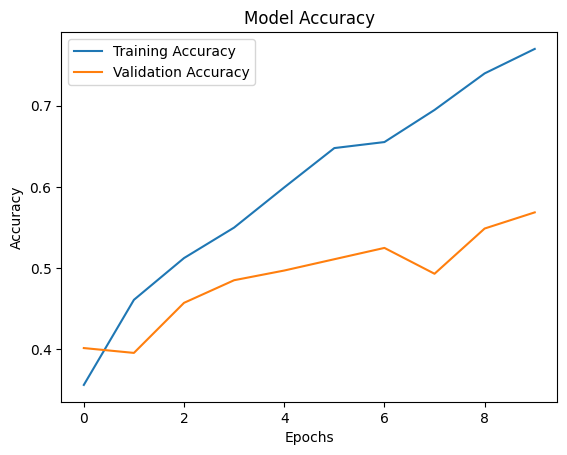

In [15]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
